In [50]:
import random as rd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Training Dataset

In [51]:
from sklearn.datasets import load_digits
images,labels = load_digits(2,return_X_y=True)

#Labeled Training Set
training_images = images[:300]
training_labels = labels[:300]

#Labeled Test Set
test_images = images[300:]
test_labels = labels[300:]

# k-NN Classification Using 2-D Features

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5,1,'2D Features of Training Images')

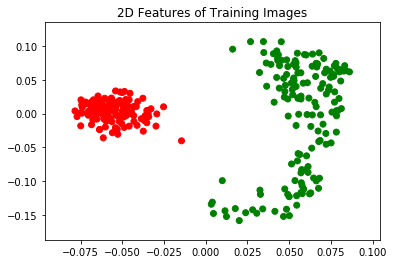

In [52]:
from sklearn.decomposition import PCA
#1. Principal Component Analysis

#Mean Centering:sum
mean_vec = (np.sum(training_images, axis=0))/300
training_images = training_images - mean_vec

#Singular Value Decomposition
u_tr,v_tr,sh_tr = np.linalg.svd(training_images,True)

#Eigenvalue Decomposition
eig = np.matmul(training_images, np.transpose(training_images))
values_tr,vectors_tr = np.linalg.eig(eig)
pc_tr = (-values_tr).argsort()[:2]
pca_tr = vectors_tr[:,pc_tr]

#Scatter Plot
label_color_dict = {0:'red',1:'green'}
cvec = [label_color_dict[label] for label in training_labels] 
plt.scatter(pca_tr[:,0],pca_tr[:,1], color = cvec)
plt.title('2D Features of Training Images')

In [53]:
#2. Classification of Test Images

#Mean Centering
mean_vec = (np.sum(test_images, axis=0))/60
test_images = test_images - mean_vec

#Singular Value Decomposition
u_test,v_test,sh_test = np.linalg.svd(test_images,True)

#Eigenvalue Decomposition
eig_test = np.matmul(test_images, np.transpose(test_images))
values_test,vectors_test = np.linalg.eig(eig_test)
pc_test = (-values_test).argsort()[:2]
pca_test = vectors_test[:,pc_test]

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5,1,'2D Features of Test Images')

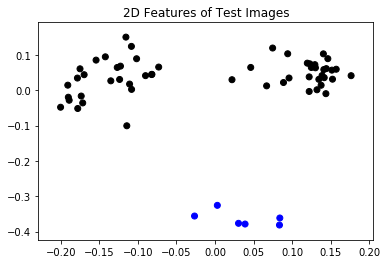

In [54]:
#K-NN Classification:Calculate distances for each point
classified_labels = np.eye(60,5)
new_labels = []
for i in range(60):
    distances = []
    for j in range(300):
        dist = pca_tr[j,:] - pca_test[i,:]
        distances.append(np.linalg.norm(dist))
        
    distances = np.array(distances)
    distances_sorted = np.argsort(distances)
    k_distances = distances_sorted[0:5]
    
    classified_labels[i,:] = training_labels[k_distances]
    new_labels.append(int(max(classified_labels[i,:].tolist(),key=(classified_labels[i,:].tolist()).count)))

#Correct v. Incorrect Classification
diff = np.array(new_labels)-test_labels
accuracy = []
for i in diff:
    if i!=0:
        i='correctly classified'
    else:
        i='incorrectly classified'
    accuracy.append(i)

#Scatter Plot
label_color_dict = {'incorrectly classified':'blue','correctly classified':'black'}
cvec = [label_color_dict[label] for label in accuracy] 
plt.scatter(pca_test[:,0],pca_test[:,1], color = cvec)
plt.title('2D Features of Test Images')

In [55]:
#3. Average Classification Error
avg_error = []
for index in diff:
    if index != 0:
        index=1
    else:
        index=0
    avg_error.append(index)

avg_classification = np.sum(avg_error)/60
print("Avg Classification Error: ")
print(avg_classification)

Avg Classification Error: 
0.9


# k-NN Classification Using Higher-dimensional Features

In [56]:
#1. r-Dimensional PCA Features

#Finding r-value
r = 0; cum_sum = 0
variance = np.linalg.norm(training_images)**2
for i in range(len(training_images)):
    cum_sum = cum_sum + v_tr[i]**2
    #print(cum_sum/variance)
    if cum_sum/variance >= 0.95:
        r = i+1
        break

In [57]:
#2. Principal Components

#Eigenvalue Decomposition - Training Set
eig = np.matmul(training_images, np.transpose(training_images))
values_tr,vectors_tr = np.linalg.eig(eig)
pc_tr = (-values_tr).argsort()[:19]
pca_tr = vectors_tr[:,pc_tr]

#Eigenvalue Decomposition - Test Set
eig_test = np.matmul(test_images, np.transpose(test_images))
values_test,vectors_test = np.linalg.eig(eig_test)
pc_test = (-values_test).argsort()[:19]
pca_test = vectors_test[:,pc_test]

In [58]:
#K-NN Classification
k_values = np.array([1,3,5,7,9])
errors = []

In [59]:
#k = 1:
k=1
classified_labels = np.eye(60,1)
new_labels = []
for i in range(60):
    distances = []
    for j in range(300):
        dist = pca_tr[j,:] - pca_test[i,:]
        distances.append(np.linalg.norm(dist))
        
    distances = np.array(distances)
    distances_sorted = np.argsort(distances)
    k_distances = distances_sorted[0:k]
    
    classified_labels[i,:] = training_labels[k_distances]
    new_labels.append(int(max(classified_labels[i,:].tolist(),key=(classified_labels[i,:].tolist()).count)))

#Avg Classification Error:
diff = np.array(new_labels)-test_labels
avg_values = []
for index in diff:
    if index != 0:
        index=1
    else:
        index=0
    avg_values.append(index)
avg_classification = np.sum(avg_values)/60
errors.append(avg_classification)
print("Avg Classification Error: ")
print(avg_classification)

Avg Classification Error: 
0.6166666666666667


In [60]:
#k = 3:
k=3
classified_labels = np.eye(60,3)
new_labels = []
for i in range(60):
    distances = []
    for j in range(300):
        dist = pca_tr[j,:] - pca_test[i,:]
        distances.append(np.linalg.norm(dist))
        
    distances = np.array(distances)
    distances_sorted = np.argsort(distances)
    k_distances = distances_sorted[0:k]
    
    classified_labels[i,:] = training_labels[k_distances]
    new_labels.append(int(max(classified_labels[i,:].tolist(),key=(classified_labels[i,:].tolist()).count)))

#Avg Classification Error:
diff = np.array(new_labels)-test_labels
avg_values = []
for index in diff:
    if index != 0:
        index=1
    else:
        index=0
    avg_values.append(index)
avg_classification = np.sum(avg_values)/60
errors.append(avg_classification)
print("Avg Classification Error: ")
print(avg_classification)

Avg Classification Error: 
0.6833333333333333


In [61]:
#k = 5:
k=5
classified_labels = np.eye(60,5)
new_labels = []
for i in range(60):
    distances = []
    for j in range(300):
        dist = pca_tr[j,:] - pca_test[i,:]
        distances.append(np.linalg.norm(dist))
        
    distances = np.array(distances)
    distances_sorted = np.argsort(distances)
    k_distances = distances_sorted[0:k]
    
    classified_labels[i,:] = training_labels[k_distances]
    new_labels.append(int(max(classified_labels[i,:].tolist(),key=(classified_labels[i,:].tolist()).count)))
#Avg Classification Error:
diff = np.array(new_labels)-test_labels
avg_values = []
for index in diff:
    if index != 0:
        index=1
    else:
        index=0
    avg_values.append(index)
avg_classification = np.sum(avg_values)/60
errors.append(avg_classification)
print("Avg Classification Error:")
print(avg_classification)

Avg Classification Error:
0.7


In [62]:
#k = 7:
k=7
classified_labels = np.eye(60,7)
new_labels = []
for i in range(60):
    distances = []
    for j in range(300):
        dist = pca_tr[j,:] - pca_test[i,:]
        distances.append(np.linalg.norm(dist))
        
    distances = np.array(distances)
    distances_sorted = np.argsort(distances)
    k_distances = distances_sorted[0:k]
    
    classified_labels[i,:] = training_labels[k_distances]
    new_labels.append(int(max(classified_labels[i,:].tolist(),key=(classified_labels[i,:].tolist()).count)))

#Avg Classification Error:
diff = np.array(new_labels)-test_labels
avg_values = []
for index in diff:
    if index != 0:
        index=1
    else:
        index=0
    avg_values.append(index)
avg_classification = np.sum(avg_values)/60
errors.append(avg_classification)
print("Avg Classification Error: ")
print(avg_classification)

Avg Classification Error: 
0.7333333333333333


In [63]:
#k = 9:
k=9
classified_labels = np.eye(60,9)
new_labels = []
for i in range(60):
    distances = []
    for j in range(300):
        dist = pca_tr[j,:] - pca_test[i,:]
        distances.append(np.linalg.norm(dist))
        
    distances = np.array(distances)
    distances_sorted = np.argsort(distances)
    k_distances = distances_sorted[0:k]
    
    classified_labels[i,:] = training_labels[k_distances]
    new_labels.append(int(max(classified_labels[i,:].tolist(),key=(classified_labels[i,:].tolist()).count)))

#Avg Classification Error:
diff = np.array(new_labels)-test_labels
avg_values = []
for index in diff:
    if index != 0:
        index=1
    else:
        index=0
    avg_values.append(index)
avg_classification = np.sum(avg_values)/60
errors.append(avg_classification)
print("Avg Classification Error: ")
print(avg_classification)

Avg Classification Error: 
0.7166666666666667


[1 3 5 7 9]
[0.6166666666666667, 0.6833333333333333, 0.7, 0.7333333333333333, 0.7166666666666667]


Text(0.5,1,'Avg Classification Error for Each k-value')

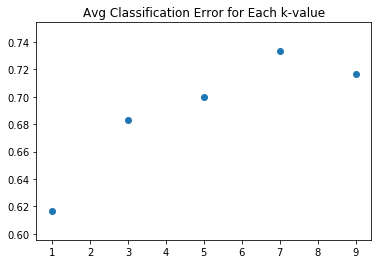

In [64]:
#Scatter Plot- K v. Avg Classification Error
print(k_values)
print(errors)
plt.scatter(k_values,errors)
plt.title("Avg Classification Error for Each k-value")

K=7 seems to be the best value to use for future k-NN Classification of digits '0' and '1'. 